In [1]:
# import data & math modules
import numpy as np
import pickle
import json
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

In [2]:
from pycocotools.coco import COCO
#bold_dir = "/home/johnson/Documents/BOLD5000"
bold_dir="/home/johnson/Documents/BOLD5000"

In [3]:
# Read Pickle file and store it as JSON
'''
    img_ids: All image ids included in coco_final_annotations.pkl
    File Structure of data: 
    {
        id: {
            'annotations': [
                {
                    'segmentation': [[
                        coordinates, ...
                    ]],
                    'area': area of segment,
                    'iscrowd': bool (0 or 1) is a number of objects highlighted,
                    'image_id': id of the image,
                    'bbox': [x, y, width, height],
                    'category_id': id of image category,
                    'id': id of image
                }
            ], ...
        }
    }
    
'''

url = "{}/BOLD5000_Stimuli/BOLD5000_Stimuli/Image_Labels/coco_final_annotations.pkl".format(bold_dir)
with open(url, 'rb') as f:
    data = pickle.load(f)
img_num = 420713
img_ids = list(data.keys())
new_json = {}
new_json["annotations"] = data[img_num]


In [4]:
# Write a json file
with open("data.json", "w") as data_file:
    json.dump(new_json, data_file, indent=2)

In [6]:
#annotation_dir = "/Users/jz/Documents/instances_train2014.json"
annotation_dir = "/home/johnson/Documents/COCO_annotations/instances_train2014.json"
coco = COCO(annotation_dir)

loading annotations into memory...
Done (t=7.42s)
creating index...
index created!


In [11]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
sports furniture appliance vehicle food outdoor electronic accessory person indoor kitchen animal


In [7]:
print(img_num)
imgIds = coco.getImgIds(imgIds = [img_num])
imgIds

420713


[420713]

In [13]:
import skimage.io as io


In [9]:
img = coco.loadImgs([420713])[0]
print(img)

{'license': 2, 'file_name': 'COCO_train2014_000000420713.jpg', 'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000420713.jpg', 'height': 640, 'width': 480, 'date_captured': '2013-11-19 18:16:18', 'flickr_url': 'http://farm3.staticflickr.com/2209/2279344112_409132a64c_z.jpg', 'id': 420713}


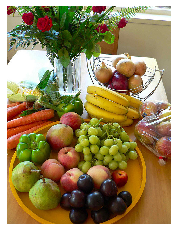

In [24]:
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

In [25]:
segments = COCO("data.json")

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


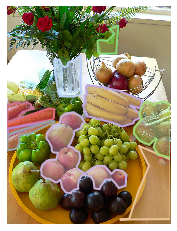

In [26]:
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = segments.getAnnIds(imgIds=img['id'], iscrowd=None)
anns = segments.loadAnns(annIds)
segments.showAnns(anns)

In [27]:
img = cv2.imread(img['coco_url'])
cv2.imshow('image',img)

error: OpenCV(4.1.1) /Users/travis/build/skvark/opencv-python/opencv/modules/highgui/src/window.cpp:352: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'imshow'


In [1]:
numSessions = [15, 15, 15, 9]

In [ ]:
def downloadCocoImage(img_id):
    